In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
df = pd.read_csv('dataset/train_clean.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,0,91.00,0,0,58.00,1,0,55.0,1,58.80,1,270000.000000
1,2,0,79.33,1,78.33,0,1,77.48,1,1,86.5,0,66.28,1,200000.000000
2,3,0,65.00,1,68.00,1,2,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,0,56.00,1,52.00,1,1,52.00,1,0,66.0,1,59.43,0,288655.405405
4,5,0,85.80,1,73.60,1,0,73.30,0,0,96.8,0,55.50,1,425000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    int64  
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    int64  
 6   hsc_s           215 non-null    int64  
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    int64  
 9   workex          215 non-null    int64  
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    int64  
 12  mba_p           215 non-null    float64
 13  status          215 non-null    int64  
 14  salary          215 non-null    float64
dtypes: float64(6), int64(9)
memory usage: 25.3 KB


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [16]:
X = df.drop(columns=['status'], axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 14), (65, 14), (150,), (65,))

In [17]:
models = {'logistic':LogisticRegression(),
         'decision_tree': DecisionTreeClassifier(),
         'svc':SVC(),
         'randomforest':RandomForestClassifier(),
         'xgb':XGBRFClassifier()
         }

In [47]:
performance_df = pd.DataFrame()
performance_dict = dict()
model_name = []
train_score = []
test_score = []
precision = []
recall = []
f1 = []
accuracy = []

Training Started for logistic
Training Score : 0.86
Testing Score: 0.8461538461538461
Accuracy Score: 0.8461538461538461
Precision Score: 0.8846153846153846
Recall Score: 0.92
F1 Score: 0.9019607843137256
Confusion Matrix for logistic is as follows:


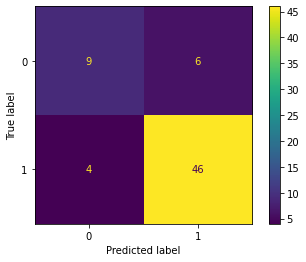

****************************************************************************************************
Training Started for decision_tree
Training Score : 1.0
Testing Score: 0.9846153846153847
Accuracy Score: 0.9846153846153847
Precision Score: 1.0
Recall Score: 0.98
F1 Score: 0.98989898989899
Confusion Matrix for decision_tree is as follows:


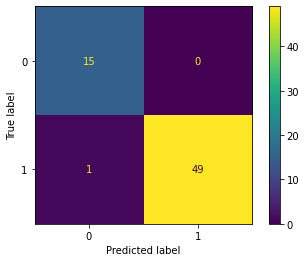

****************************************************************************************************
Training Started for svc
Training Score : 0.6533333333333333
Testing Score: 0.7692307692307693
Accuracy Score: 0.7692307692307693
Precision Score: 0.7692307692307693
Recall Score: 1.0
F1 Score: 0.8695652173913044
Confusion Matrix for svc is as follows:


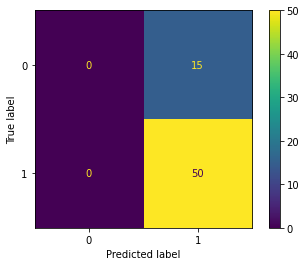

****************************************************************************************************
Training Started for randomforest
Training Score : 1.0
Testing Score: 0.9846153846153847
Accuracy Score: 0.9846153846153847
Precision Score: 0.9803921568627451
Recall Score: 1.0
F1 Score: 0.99009900990099
Confusion Matrix for randomforest is as follows:


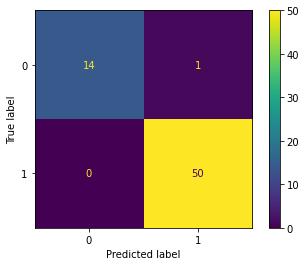

****************************************************************************************************
Training Started for xgb
Training Score : 1.0
Testing Score: 0.9846153846153847
Accuracy Score: 0.9846153846153847
Precision Score: 1.0
Recall Score: 0.98
F1 Score: 0.98989898989899
Confusion Matrix for xgb is as follows:


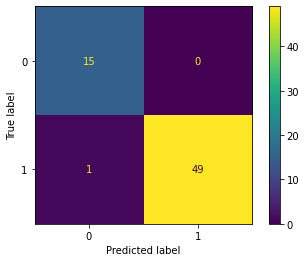

****************************************************************************************************


In [62]:
for name,model in models.items():
    print(f"Training Started for {name}")
    model_name.append(name)
    model.fit(X_train, y_train)
    print(f"Training Score : {model.score(X_train, y_train)}")
    train_score.append(model.score(X_train, y_train))
    print(f"Testing Score: {model.score(X_test, y_test)}")
    test_score.append(model.score(X_test, y_test))
    y_pred = model.predict(X_test)
    print(f"Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_pred)}")
    accuracy.append(accuracy_score(y_true=y_test, y_pred=y_pred))
    print(f"Precision Score: {precision_score(y_true=y_test, y_pred=y_pred)}")
    precision.append(precision_score(y_true=y_test, y_pred=y_pred))
    print(f"Recall Score: {recall_score(y_true=y_test, y_pred=y_pred)}")
    recall.append(recall_score(y_true=y_test, y_pred=y_pred))
    print(f"F1 Score: {f1_score(y_true=y_test, y_pred=y_pred)}")
    f1.append(f1_score(y_true=y_test, y_pred=y_pred))
    print(f"Confusion Matrix for {name} is as follows:")
    ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred), display_labels=model.classes_).plot()
    plt.show()
    print("*"*100)

In [51]:
d = {'model_name':model_name, 'Training_score':train_score,'Testing_Score':test_score,'accuracy_score':accuracy,'Precision_Score':precision,
     'Recall_Score':recall,'F1_Score':f1}
performance_df = pd.DataFrame(d)

In [52]:
performance_df

,model_name,Training_score,Testing_Score,accuracy_score,Precision_Score,Recall_Score,F1_Score
0,logistic,0.860000,0.846154,0.846154,0.884615,0.92,0.901961
1,decision_tree,1.000000,0.984615,0.984615,1.000000,0.98,0.989899
2,svc,0.653333,0.769231,0.769231,0.769231,1.00,0.869565
3,randomforest,1.000000,0.984615,0.984615,0.980392,1.00,0.990099
4,xgb,1.000000,0.984615,0.984615,1.000000,0.98,0.989899


In [43]:
precision

[0.8846153846153846, 1.0, 0.7692307692307693, 0.9615384615384616, 1.0]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    int64  
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    int64  
 6   hsc_s           215 non-null    int64  
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    int64  
 9   workex          215 non-null    int64  
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    int64  
 12  mba_p           215 non-null    float64
 13  status          215 non-null    int64  
 14  salary          215 non-null    float64
dtypes: float64(6), int64(9)
memory usage: 25.3 KB


In [55]:
df['status'].value_counts()

1    148
0     67
Name: status, dtype: int64

In [56]:
67/215

0.3116279069767442

In [58]:
performance_df.sort_values(by='Precision_Score', ascending=False)

,model_name,Training_score,Testing_Score,accuracy_score,Precision_Score,Recall_Score,F1_Score
1,decision_tree,1.000000,0.984615,0.984615,1.000000,0.98,0.989899
4,xgb,1.000000,0.984615,0.984615,1.000000,0.98,0.989899
3,randomforest,1.000000,0.984615,0.984615,0.980392,1.00,0.990099
0,logistic,0.860000,0.846154,0.846154,0.884615,0.92,0.901961
2,svc,0.653333,0.769231,0.769231,0.769231,1.00,0.869565
